In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
import sklearn.preprocessing as preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
%matplotlib inline

E:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## data preparation

In [3]:
# load the data
train=pd.read_csv("./data/train.csv")
test=pd.read_csv("./data/test.csv")

### learn the data

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


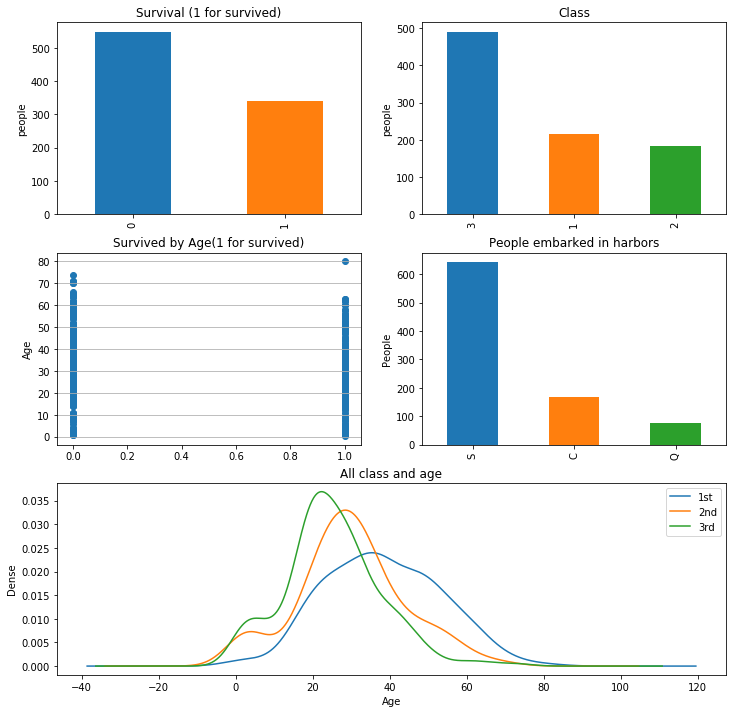

In [90]:
fig = plt.figure(figsize=(12,12))
fig.set(alpha=0.2)

plt.subplot2grid((3,2),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title("Survival (1 for survived)")
plt.ylabel("people")

plt.subplot2grid((3,2),(0,1))
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel("people")
plt.title("Class")

plt.subplot2grid((3,2),(1,0))
plt.scatter(train.Survived, train.Age)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y') 
plt.title("Survived by Age(1 for survived)")

plt.subplot2grid((3,2),(2,0), colspan=3)
train.Age[train.Pclass == 1].plot(kind='kde')   
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.ylabel("Dense") 
plt.title("All class and age")
plt.legend(('1st', '2nd','3rd'),loc='best') # sets our legend for our graph.


plt.subplot2grid((3,2),(1,1))
train.Embarked.value_counts().plot(kind='bar')
plt.title("People embarked in harbors")
plt.ylabel("People")  
plt.show()


<Figure size 432x288 with 0 Axes>

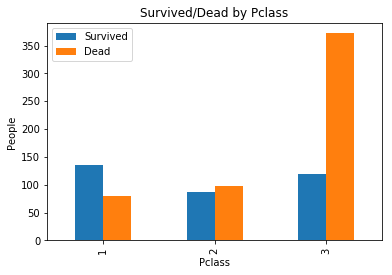

In [91]:
fig = plt.figure()
survived_0 = train.Pclass[train.Survived==0].value_counts()
survived_1 = train.Pclass[train.Survived==1].value_counts()
df=pd.DataFrame({"Survived":survived_1,"Dead":survived_0})
df.plot(kind="bar")
plt.title("Survived/Dead by Pclass")
plt.xlabel("Pclass")
plt.ylabel("People")
plt.show()

<Figure size 432x288 with 0 Axes>

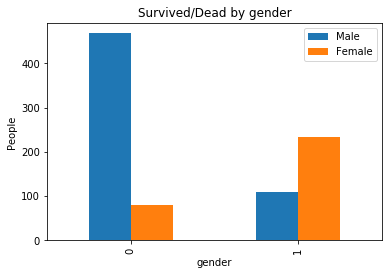

In [92]:
fig = plt.figure()
survived_m = train.Survived[train.Sex=='male'].value_counts()
survived_f = train.Survived[train.Sex=='female'].value_counts()
df=pd.DataFrame({"Male":survived_m,"Female":survived_f})
df.plot(kind="bar")
plt.title("Survived/Dead by gender")
plt.xlabel("gender")
plt.ylabel("People")
plt.show()

### clean the data

In [93]:
# fill in mssing age data
def set_missing_ages(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    y = known_age[:,0]
    x = known_age[:,1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x,y)
    
    predictAges = rfr.predict(unknown_age[:,1::])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictAges
    return df, rfr

train, rfr_train = set_missing_ages(train)
# there is one abnormal data here, one record has a Fare value is NaN
# I put mean here
test.loc[(test.Fare.isnull()),'Fare'] = test.Fare.mean()
test, rfr_train = set_missing_ages(test)

In [94]:
# transform categoriges to one hot encoding columns
# drop Name, Cabin and Ticket
def one_hot_categorical(df):
    d_Embardked = pd.get_dummies(df['Embarked'],prefix='Embarked')
    d_Sex = pd.get_dummies(df['Sex'],prefix='Sex')
    d_Pclass = pd.get_dummies(df['Pclass'],prefix='Pclass')

    new_df = pd.concat([df,d_Embardked,d_Sex,d_Pclass],axis=1)
    new_df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
    return new_df

df_train = one_hot_categorical(train)
df_test = one_hot_categorical(test)

In [95]:
# scaling data
def scaling_age_and_fare(df):
    scaler = preprocessing.StandardScaler()
    age_scale_param = scaler.fit(df[['Age']])
    df['Age_scaled'] = scaler.fit_transform(df[['Age']],age_scale_param)[:,0]
    fare_scale_param = scaler.fit(df[['Fare']])
    df['Fare_scaled'] = scaler.fit_transform(df[['Fare']],fare_scale_param)[:,0]
    return df

df_train = scaling_age_and_fare(df_train)
df_test = scaling_age_and_fare(df_test)

## build model and train

In [96]:
df_train = df_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
np_train = df_train.values
y = np_train[:,0]
X = np_train[:,1:]
clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
clf.fit(X,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

## prediction

In [98]:
df_test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(df_test)
submission = pd.DataFrame({
    'PassengerId': test["PassengerId"],
    'Survived': predictions.astype(np.int32)
})
submission.to_csv('./data/logisticRegression.csv',mode='w+',index=False)